## 1. 주어진 데이터 로드하기

In [18]:
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

data1 = pd.read_csv('../data/abalone_attributes.txt', header=None)
data = pd.read_csv('../data/abalone.txt', header=None)
data = data.rename(columns=data1[0])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# 2. 입력으로 사용할 변수들과 레이블로 성별 변수 나누기

In [19]:
data = data[data['Sex']!= 'I']
data = data.reset_index(drop=True);

# 3. 변수별 기초 통계량 확인

* 남성 기초 통계량 

In [20]:
data[data['Sex']=='M'].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497
std,0.102697,0.084398,0.034804,0.470581,0.223000,0.104919,0.130834,3.026349
min,0.155000,0.110000,0.025000,0.015500,0.006500,0.003000,0.005000,3.000000
25%,0.505000,0.395000,0.130000,0.671625,0.276375,0.145875,0.190000,9.000000
50%,0.580000,0.455000,0.155000,0.975750,0.421750,0.210000,0.276000,10.000000
75%,0.630000,0.500000,0.175000,1.265625,0.566000,0.278000,0.355500,12.000000
max,0.780000,0.630000,0.515000,2.825500,1.351000,0.760000,0.897000,27.000000


* 여성 기초 통계량

In [21]:
data[data['Sex']=='F'].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
std,0.086160,0.070954,0.039984,0.430316,0.198663,0.097617,0.125649,3.104256
min,0.275000,0.195000,0.015000,0.080000,0.031000,0.021000,0.025000,5.000000
25%,0.525000,0.410000,0.140000,0.730000,0.295000,0.159000,0.213250,9.000000
50%,0.590000,0.465000,0.160000,1.038500,0.440500,0.224000,0.295000,10.000000
75%,0.640000,0.505000,0.175000,1.320250,0.573250,0.297250,0.375000,12.000000
max,0.815000,0.650000,1.130000,2.657000,1.488000,0.590000,1.005000,29.000000


# 4. 사이킷 런의 min_max 스케일링 함수로 값의 범위를 0~1 사이로 변경하시오

In [22]:
y = data['Sex']
X = data.drop(columns='Sex')

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print('스케일 조정 후 특성별 최소값:\n {}'.format(X_scaled.min(axis = 0)))
print('스케일 조정 후 특성별 최대값:\n {}'.format(X_scaled.max(axis = 0)))

스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y, random_state = 0)

# 5. RandomForestClassfier 를 이용해 분류를 수행

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)

print('훈련 세트 정확도 : {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.529


# 6. DecisionTreeclassfier 를 이용해 분류를 수행

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('훈련셋 점수 :{:.3f}'.format(tree.score(X_train, y_train)))
print('테스트셋 점수 :{:.3f}'.format(tree.score(X_test, y_test)))

훈련셋 점수 :1.000
테스트셋 점수 :0.492


# 7. DecisionTree에서 각 피처의 중요도가 높은 순으로 Top5 피처를 막대그래프로 표현하시오

In [41]:
tot = pd.DataFrame({'f':X.columns, 'fi':tree.feature_importances_})
tot = tot.sort_values('fi', ascending=False)
tot = tot.head(5)

Text(0.5, 1.0, 'feature importances Top 5')

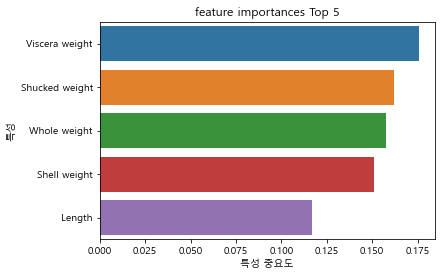

In [42]:
import seaborn as sns
ax = sns.barplot(x = 'fi', y = 'f', data = tot)
ax.set_xlabel('특성 중요도')
ax.set_ylabel('특성')
ax.set_title('feature importances Top 5')
